In [2]:


import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df_user_data = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Info_UserData.csv')
df_log_problem = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Log_Problem.csv')
df_info_content = pd.read_csv('/kaggle/input/learning-activity-public-dataset-by-junyi-academy/Info_Content.csv')

In [4]:
#storing tabulare data and includes compression
df_user_data.to_parquet('Info_UserData.parquet')
df_log_problem.to_parquet('Log_Problem.parquet')
df_info_content.to_parquet('Info_Content.parquet')

In [6]:
df_user_data = pd.read_parquet('/kaggle/working/Info_UserData.parquet')
df_log_problem = pd.read_parquet('/kaggle/working/Log_Problem.parquet')
df_info_content = pd.read_parquet('/kaggle/working/Info_Content.parquet')

In [9]:
print("\nLog Problem Data:")
df_log_problem.head()
#records the attampt when user try to answer each problem


Log Problem Data:


,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,None,None,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,None,None,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,None,None,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,None,None,0


In [10]:
print("\nInfo Content Data:")
df_info_content.head()


Info Content Data:


,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [7]:
# Display the first few rows of each dataset
print("User Data:")
df_user_data.head()
#point are earned after completing exercises,watching video, and when the user receive a badge
#750*(effective watching time/ video length)
#2018 to 2019

User Data:


,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,None,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,None,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,None,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,None,7945,0,2019-01-24,2,km,1,False,0,1,0


# Data Preprocessing

###  Our purpose for this project is Identifying students who are at risk of downgrades

In [13]:
# Our target variable is_downgrade
target_feature = 'is_downgrade'
# We are selecting only not null rows
df_log_problem = df_log_problem[df_log_problem[target_feature].notnull()]

In [14]:
# Merge datasets
merged_data = pd.merge(df_log_problem, df_user_data, on='uuid')
merged_data = pd.merge(merged_data, df_info_content[['ucid', 'difficulty', 'learning_stage', ]], on='ucid')

# Ensure the 'timestamp_TW' column is a datetime
merged_data['timestamp_TW'] = pd.to_datetime(merged_data['timestamp_TW'])
merged_data[target_feature] = merged_data[target_feature].astype(bool)


# Display the first few rows of the merged dataset
print("Merged Data:")
merged_data.head()


Merged Data:


,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,difficulty,learning_stage
0,2019-05-26 21:00:00+00:00,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,...,2019-03-23,7,tp,1,False,0,1,1,normal,junior
1,2019-05-01 21:15:00+00:00,nShzEWP6fhcIm0VtzvFWrWeKZGyvY5QdBdgcFpmdGI0=,ZcwX8fZUrnZDOsvBOPux3Oaf1viIG83MNe5frh0jnQw=,hkb4Gw5E1h59qypzQnhDyLTkkXOVgYt6HwaTw1FoToA=,11,1,True,28,1,0,...,2019-05-01,7,tp,1,False,0,1,0,easy,junior
2,2019-05-25 11:30:00+00:00,Hlb8EIiIDMBr3aYCxFS8kUCSWXIasEJ9+sx6D0qN1dE=,5ZJ5qSJYX6dsa9HODIJqoF60NnmdmYfFjBKCus7D7og=,Usk0M+wYc9nMF3rmxydgBma9Q3cqPDxn/zHPgcqNF7k=,5,1,True,10,1,0,...,2019-01-09,5,ty,2,False,0,2,0,easy,elementary
3,2019-05-06 15:00:00+00:00,MM3033dFN6XkMQe7crp/M51zqmyZPc157s7V1OYKD8Q=,dVKfHzCsi1dOBhd343bsUNF4dowsiANnvRBkWqToitg=,x3QK7Rx5zIDFuRq1bT1wE8TAqW1Q0RkNSr1BbzdOoMU=,5,1,True,8,1,0,...,2019-03-12,3,ty,1,False,0,1,0,unset,elementary
4,2019-05-14 11:15:00+00:00,NWA1O+ucAni/e0FL9i0EpheDEGUdAoxfhGYALLtcpf0=,jImuGvSym6odgRoYw7vgkq4HUbmJ1tDW9fq6bo/yN5s=,2NoStxYAVswdaEVYVssCTcKoXtvX/ELaQx61KlS/J4s=,6,1,True,13,1,0,...,2019-02-12,3,hlc,0,False,0,0,0,easy,elementary


In [15]:
# Creating new feature avg_time_per_problem
merged_data['avg_time_per_problem'] = merged_data['total_sec_taken'] / merged_data['total_attempt_cnt']

In [16]:
# Handling the missing values
# We are filling the missing numerical values with median

numeric_features = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[numeric_features] = merged_data[numeric_features].fillna(merged_data[numeric_features].median())

# for col in numeric_features:
#     merged_data[col] = merged_data([col].median(), inplace=True)
    
# We are filling the missing categorical values with mode
categorical_features = ['gender', 'difficulty', 'learning_stage']
for col in categorical_features:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mode()[0])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the transformation
data_encoded = preprocessor.fit_transform(merged_data)

In [18]:
# Convert the encoded data back to a DataFrame
encoded_columns = preprocessor.get_feature_names_out()
data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_columns)
data_encoded_df[target_feature] = merged_data[target_feature].values

# Exploratory Data Analysis

### Student Count for each gender


In [19]:
print('Total number of users:', len(df_user_data))

Total number of users: 72758


In [20]:
df_InfoUser = df_user_data.fillna('-1')
count_each_gender = df_user_data['gender'].value_counts()
count_each_gender

gender
female         13099
male           12856
unspecified     6950
Name: count, dtype: int64

In [21]:
downgrade_counts = merged_data['is_downgrade'].value_counts(normalize=True)
print("Percentage of Students Downgraded:", downgrade_counts[True] * 100, "%")  # Replace True with the value for downgrades


Percentage of Students Downgraded: 1.306186012071007 %


In [22]:
downgrade_by_difficulty = merged_data.groupby('difficulty')['is_downgrade'].mean()
downgrade_by_learning_stage = merged_data.groupby('learning_stage')['is_downgrade'].mean()
print("Downgrade Rate by Difficulty:", downgrade_by_difficulty)
print("Downgrade Rate by Learning Stage:", downgrade_by_learning_stage)


Downgrade Rate by Difficulty: difficulty
easy      0.010149
hard      0.025277
normal    0.019803
unset     0.016584
Name: is_downgrade, dtype: float64
Downgrade Rate by Learning Stage: learning_stage
elementary    0.012562
junior        0.014971
senior        0.089074
Name: is_downgrade, dtype: float64


### **Calculation of the proportion of students who downgraded within each category**

In [23]:
downgrade_by_difficulty = merged_data.groupby('difficulty')['is_downgrade'].mean()
downgrade_by_learning_stage = merged_data.groupby('learning_stage')['is_downgrade'].mean()
print("Downgrade Rate by Difficulty:", downgrade_by_difficulty)
print("Downgrade Rate by Learning Stage:", downgrade_by_learning_stage)

Downgrade Rate by Difficulty: difficulty
easy      0.010149
hard      0.025277
normal    0.019803
unset     0.016584
Name: is_downgrade, dtype: float64
Downgrade Rate by Learning Stage: learning_stage
elementary    0.012562
junior        0.014971
senior        0.089074
Name: is_downgrade, dtype: float64


### Here is shown visualizion the proportions of students who downgraded within each difficulty level and learning stage

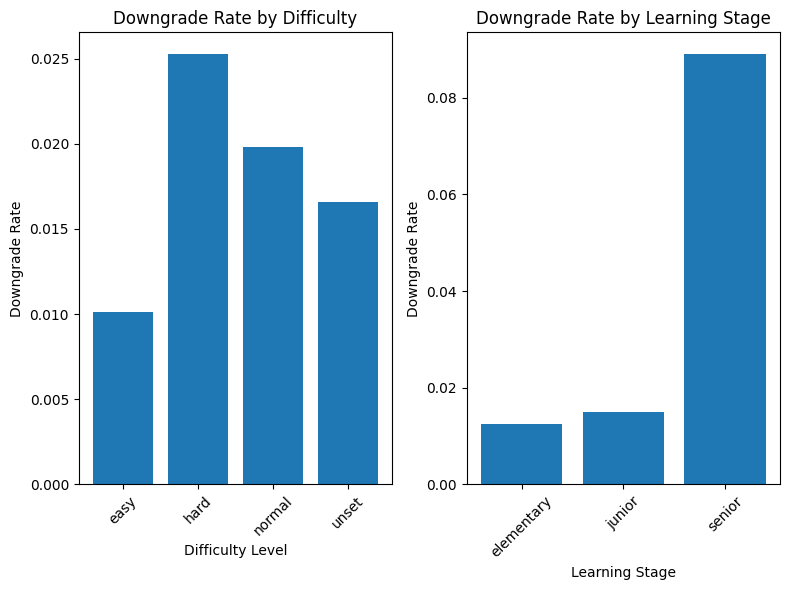

In [24]:
import matplotlib.pyplot as plt

# Assuming you have already calculated downgrade rates:
downgrade_by_difficulty = merged_data.groupby('difficulty')['is_downgrade'].mean()
downgrade_by_learning_stage = merged_data.groupby('learning_stage')['is_downgrade'].mean()

# Create bar charts
plt.figure(figsize=(8, 6))

# Difficulty Levels
plt.subplot(1, 2, 1)
plt.bar(downgrade_by_difficulty.index, downgrade_by_difficulty.values)
plt.xlabel("Difficulty Level")
plt.ylabel("Downgrade Rate")
plt.title("Downgrade Rate by Difficulty")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many categories

# Learning Stages
plt.subplot(1, 2, 2)
plt.bar(downgrade_by_learning_stage.index, downgrade_by_learning_stage.values)
plt.xlabel("Learning Stage")
plt.ylabel("Downgrade Rate")
plt.title("Downgrade Rate by Learning Stage")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### EDA on info user data

In [25]:
print('Total number of users:', len(df_info_content))

Total number of users: 1330


In [26]:
df_InfoUser = df_user_data.fillna('-1')
count_each_gender = df_user_data['gender'].value_counts()
count_each_gender


gender
female         13099
male           12856
unspecified     6950
Name: count, dtype: int64

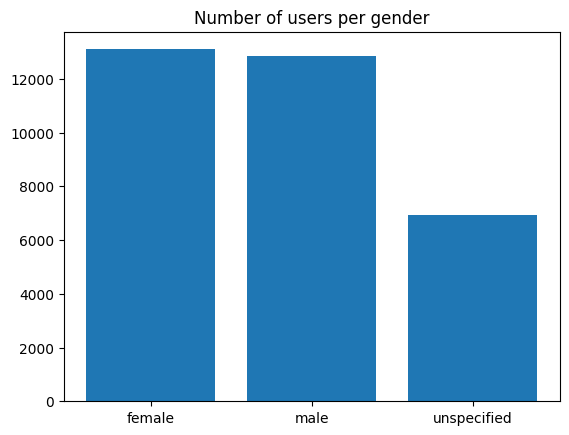

In [27]:
plt.title('Number of users per gender')
plt.bar(count_each_gender.index, count_each_gender.values)
plt.show()

In [28]:
# Select students from grade 1 to grade 7
df_elem = df_user_data[(df_user_data['user_grade'] > 0) & (df_user_data['user_grade'] < 8)]
df_elem.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,6.062700e+04,60627.000000,60627.000000,60627.000000,60627.000000,60627.000000,60627.000000
mean,6.483270e+04,9.355667,4.989955,0.930378,0.226054,0.924654,0.050572
std,1.267967e+05,18.207039,1.543810,1.648134,6.967859,2.080767,0.332608
min,3.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.465000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.109500e+04,3.000000,5.000000,1.000000,0.000000,1.000000,0.000000
75%,6.760100e+04,10.000000,6.000000,1.000000,0.000000,1.000000,0.000000
max,4.047528e+06,673.000000,7.000000,106.000000,966.000000,120.000000,24.000000


### EDA On problem set

In [29]:
# Lets randomly pick a user and an exercise and observe the learning process!
learning_path = df_log_problem[(df_log_problem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=") &
                              (df_log_problem['ucid'] == "FDFKlshYbN4rO93MtgimwfpEoKerSWp1RFhoSKWXHsY=")]

In [30]:
#sort by problem_number
# learning_path = learning_path.sort_values(by=['problem_number']).reset_index()
# learning_path = learning_path[['timestamp_TW', 'upid', 'problem_number', 'exercise_problem_repeat_session', 'is_correct']]
# learning_path

#### How long does it take a user to finish a problem ?

In [31]:
uuidgb = df_log_problem.groupby('uuid')

In [32]:
problem_cnt = uuidgb['uuid'].count()
total_time = uuidgb['total_sec_taken'].sum()
mean_time_taken = total_time / problem_cnt
print("The mean of mean_time_taken", mean_time_taken.mean())
print("The std of mean_time_taken", mean_time_taken.std())

The mean of mean_time_taken 30.466031776879834
The std of mean_time_taken 36.900004491516064


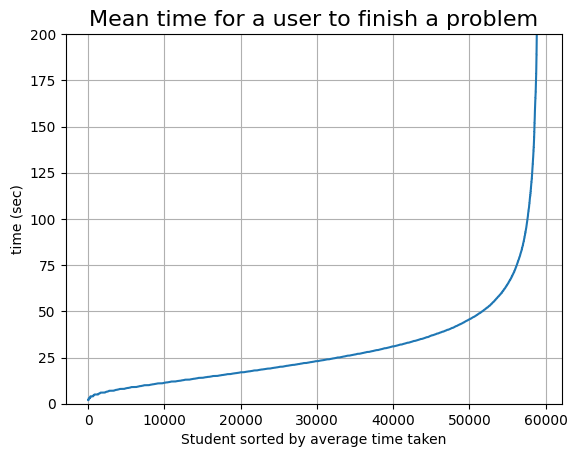

In [33]:
plt.plot(np.sort(mean_time_taken))

plt.title('Mean time for a user to finish a problem',fontsize=16)
plt.xlabel('Student sorted by average time taken', fontsize=10)
plt.ylabel('time (sec)', fontsize=10)
plt.ylim((0, 200))

plt.grid()
plt.show()

In [34]:
# There are definitely outliers in the time recorded
mean_time_taken[mean_time_taken > 1000]

uuid
PcnNXhGBnBmyvZnfTjQmoz9+JfcYTrMmfXk89AHI4Jw=    1233.000000
Q68n3zJ0merpFQMkIawNGskI+IK0VKG0c8pDTnjz3gU=    1169.000000
Z9B6qqSkJmHKexrQ58okvn46XGxzkKIDLcZ9xbY5kR8=    1773.000000
cbFlu+LTz4XdWctSULEoJl6Jd2PdefTP6W8/VJhQSWw=    1210.666667
iBOTOfCWmexJszr9ijgJbtPyZAVmFn/5kHatgw1eIQE=    1800.000000
pR3gfDtyx3WibWtQdZmN6CCFsA8wxhzxArkvhyBy5qE=    1528.000000
dtype: float64

### For each exercise, how many math problems were done by elementary students from 2018-09-01 to 2018-09-*30*

In [35]:
ucid_chosen = df_info_content[df_info_content['learning_stage']=='elementary']['ucid']

In [36]:
timefiltering = (df_log_problem['timestamp_TW'] >= "2018-09-01") & (df_log_problem['timestamp_TW'] < "2018-11-01")
filter_ucid = (df_log_problem['ucid'].isin(ucid_chosen))
df_LogProblem_elem = df_log_problem[filter_ucid & timefiltering].groupby(['ucid']).size().reset_index(name='counts')
df_LogProblem_elem

,ucid,counts
0,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,20
1,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,19
2,+aXi8dpg0URdKkJtkicic7DrTHAWPSnR9bwD+QouANE=,332
3,+c+5BQh1a2P75VjWgg/aX+j7kru6tteMWrupq+MMQgw=,24
4,+g5YlvjiVYzjFfpMkHEGCty7PGcKRuuCVDY/g8dzoD0=,2
...,...,...
743,z7j7u9pIZBLTXsNZB7xMkIJ2CB++xDwCfAFzUG8Juco=,634
744,z9WEaz3dU4bh7FPuKdAt6UrOgqpVnwWFrb/AL4dkKJs=,153
745,zFUHHn64b2GorjfAU6+BVy85oSZxzLhsrqGzKB7JwZc=,78
746,zX5HAUpRYC4F7YPNs5tUeBqVi++rEmPUfsAtHpoZmEQ=,712


### EDA on info-content

In [37]:
# How many exercises are in each learning stage?
diff=df_info_content['learning_stage'].value_counts()

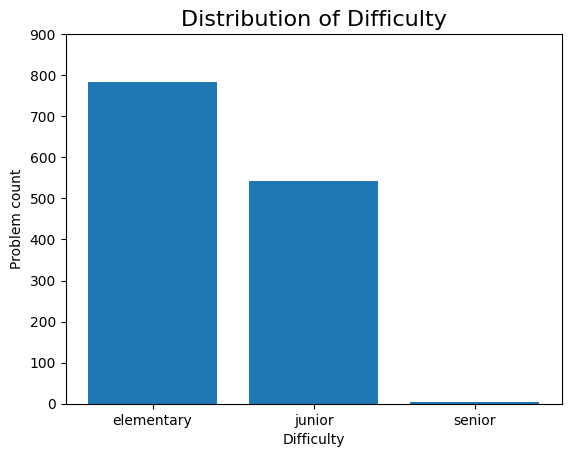

In [38]:
plt.bar(x=diff.index, height=diff)

plt.ylim((0, 900))
plt.title('Distribution of Difficulty',fontsize=16)
plt.xlabel('Difficulty', fontsize=10)
plt.ylabel('Problem count', fontsize=10)

plt.show()

In [39]:
import numpy as np

# Assuming your merged DataFrame containing student data is named 'merged_data'

# Identify numerical features
numerical_features = merged_data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    # Calculate IQR
    Q1 = merged_data[feature].quantile(0.25)
    Q3 = merged_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on IQR (potential outliers)
    outliers_iqr = merged_data[(merged_data[feature] < (Q1 - 1.5 * IQR)) | (merged_data[feature] > (Q3 + 1.5 * IQR))]

    # Print outliers for each feature
    print(f"Potential Outlier Counts (IQR) for {feature}:")
    print(len(outliers_iqr))

Potential Outlier Counts (IQR) for problem_number:
140865
Potential Outlier Counts (IQR) for exercise_problem_repeat_session:
249160
Potential Outlier Counts (IQR) for total_sec_taken:
158179
Potential Outlier Counts (IQR) for total_attempt_cnt:
19983
Potential Outlier Counts (IQR) for used_hint_cnt:
17113
Potential Outlier Counts (IQR) for level:
182448
Potential Outlier Counts (IQR) for points:
135896
Potential Outlier Counts (IQR) for badges_cnt:
117231
Potential Outlier Counts (IQR) for user_grade:
24872
Potential Outlier Counts (IQR) for has_teacher_cnt:
90794
Potential Outlier Counts (IQR) for has_student_cnt:
80401
Potential Outlier Counts (IQR) for belongs_to_class_cnt:
138505
Potential Outlier Counts (IQR) for has_class_cnt:
153262
Potential Outlier Counts (IQR) for avg_time_per_problem:
155088


# Model Build And Training

In [40]:
# Define features (X) and target (y)
X = data_encoded_df.drop(target_feature, axis=1)
y = data_encoded_df[target_feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models with simpler or optimized parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),  # Reduce number of trees and use parallel processing
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),  # Reduce number of trees
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get probabilities if available
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Predictions': y_pred,
        'Probabilities': y_proba
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
                     Accuracy Precision    Recall  F1 Score  \
Logistic Regression  0.999467  0.997991  0.961084  0.979189   
Random Forest        0.999512  0.998886  0.963664  0.980959   
Gradient Boosting    0.999509  0.999331  0.963019  0.980839   

                                                           Predictions  \
Logistic Regression  [False, False, False, False, False, False, Fal...   
Random Forest        [False, False, False, False, False, False, Fal...   
Gradient Boosting    [False, False, False, False, False, False, Fal...   

                                                         Probabilities  
Logistic Regression  [0.0004747518607557279, 0.0004945917635211245,...  
Random Forest        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
Gradient Boosting    [0.000730354353947511, 0.00018189215418414035,...  


                     Accuracy Precision    Recall  F1 Score
Logistic Regression  0.999467  0.997991  0.961084  0.979189
Random Forest        0.999512  0.998886  0.963664  0.980959
Gradient Boosting    0.999509  0.999331  0.963019  0.980839


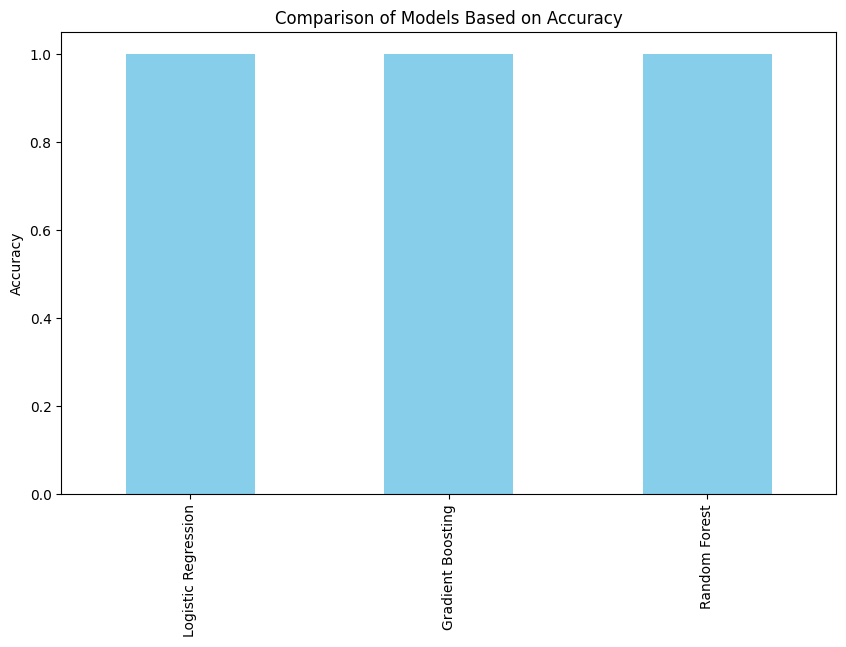

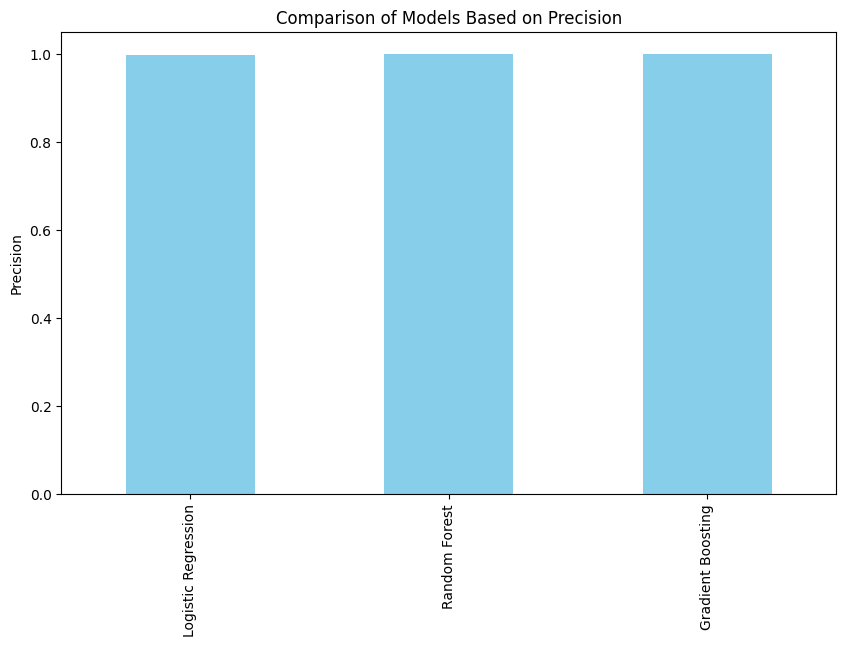

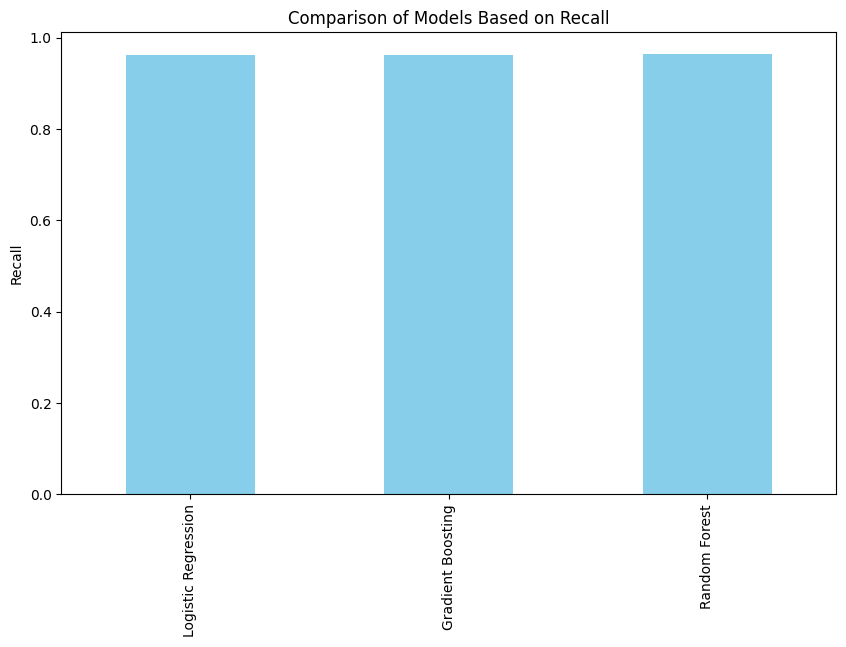

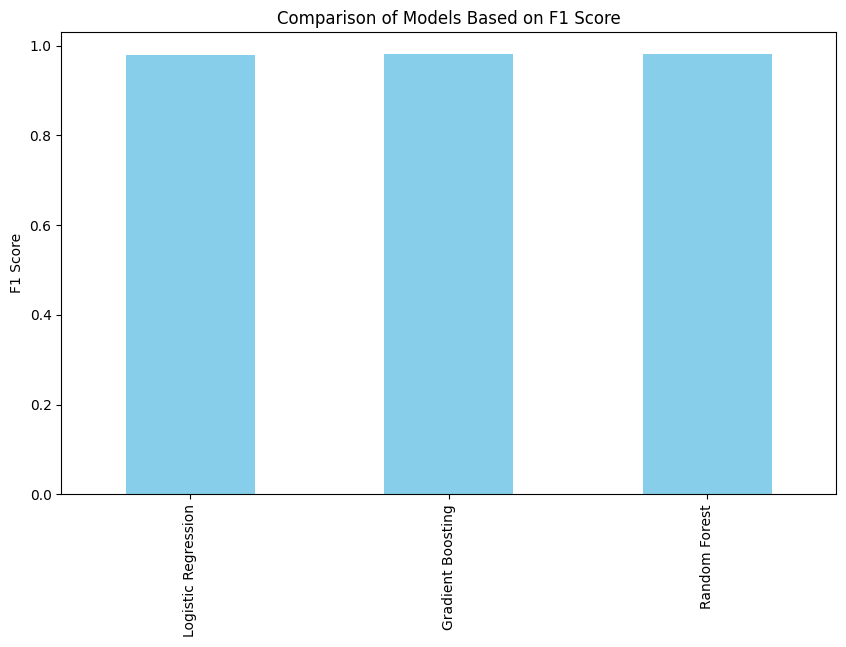

In [42]:
# Display metrics for comparison
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']])

# Visualize the performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    results_df[metric].sort_values().plot(kind='bar', color='skyblue')
    plt.title(f'Comparison of Models Based on {metric}')
    plt.ylabel(metric)
    plt.show()